In [1]:
import pandas as pd
import numpy as np


# Problem Statement

# Data Gathering

In [2]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# EDA

In [3]:
df.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [5]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:>

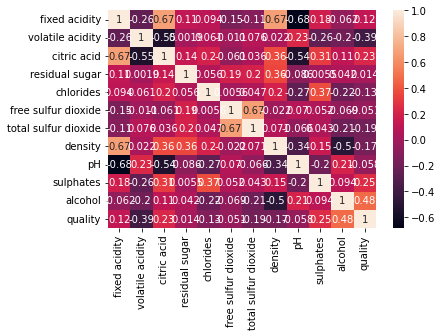

In [7]:
import seaborn as sns

sns.heatmap(df.corr(),annot=True)

In [8]:
df.corr().tail(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality,0.124052,-0.390558,0.226373,0.013732,-0.128907,-0.050656,-0.1851,-0.174919,-0.057731,0.251397,0.476166,1.0


## Outliers Detection

In [9]:
def get_outliers(array):
    outlier = []
    mean = np.mean(array)
    std = np.std(array)
    print(f"Mean of Array = {mean}")
    print(f"Std Deviation of Array = {std}")
    
    for i in array: 
        z_score = (i - mean) / std 
        
        if np.abs(z_score) > 3: 
            outlier.append(i)
            print(f"value = {i} and Z-score = {np.around(z_score,2)}")
    return outlier

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

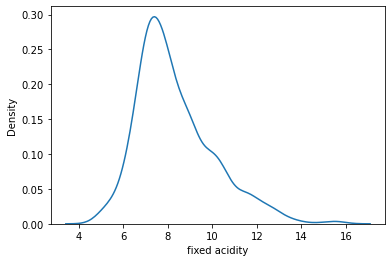

In [10]:
sns.kdeplot(df["fixed acidity"])

## Fixed Acidity

C:\Users\prran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fixed acidity'>

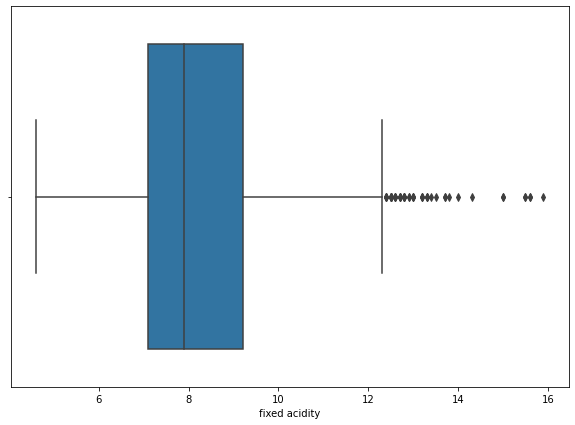

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.boxplot(df["fixed acidity"] )

In [12]:
get_outliers(df["fixed acidity"])

Mean of Array = 8.319637273295838
Std Deviation of Array = 1.7405518001102782
value = 15.0 and Z-score = 3.84
value = 15.0 and Z-score = 3.84
value = 13.8 and Z-score = 3.15
value = 14.0 and Z-score = 3.26
value = 13.7 and Z-score = 3.09
value = 13.7 and Z-score = 3.09
value = 15.6 and Z-score = 4.18
value = 14.3 and Z-score = 3.44
value = 15.5 and Z-score = 4.13
value = 15.5 and Z-score = 4.13
value = 15.6 and Z-score = 4.18
value = 15.9 and Z-score = 4.36


[15.0, 15.0, 13.8, 14.0, 13.7, 13.7, 15.6, 14.3, 15.5, 15.5, 15.6, 15.9]

## volatile acidity

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

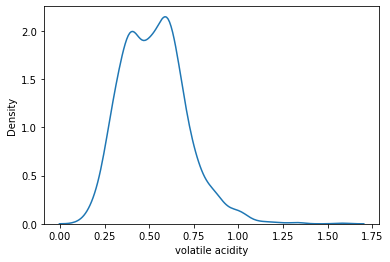

In [13]:
sns.kdeplot(df["volatile acidity"])

C:\Users\prran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='volatile acidity'>

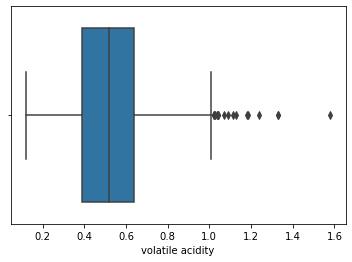

In [14]:
sns.boxplot(df["volatile acidity"])

In [15]:
get_outliers(df["volatile acidity"])

Mean of Array = 0.5278205128205131
Std Deviation of Array = 0.17900370424468975
value = 1.13 and Z-score = 3.36
value = 1.07 and Z-score = 3.03
value = 1.33 and Z-score = 4.48
value = 1.33 and Z-score = 4.48
value = 1.09 and Z-score = 3.14
value = 1.24 and Z-score = 3.98
value = 1.185 and Z-score = 3.67
value = 1.115 and Z-score = 3.28
value = 1.58 and Z-score = 5.88
value = 1.18 and Z-score = 3.64


[1.13, 1.07, 1.33, 1.33, 1.09, 1.24, 1.185, 1.115, 1.58, 1.18]

## citric acid

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

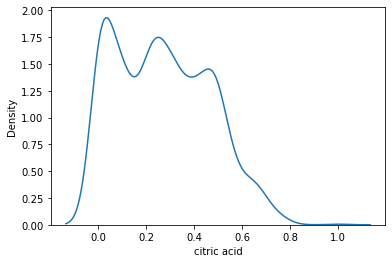

In [16]:
sns.kdeplot(df["citric acid"])

C:\Users\prran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='citric acid'>

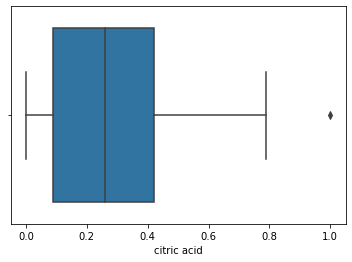

In [17]:
sns.boxplot(df["citric acid"])

In [18]:
get_outliers(df["citric acid"])

Mean of Array = 0.2709756097560964
Std Deviation of Array = 0.1947402144523329
value = 1.0 and Z-score = 3.74


[1.0]

## residual sugar

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

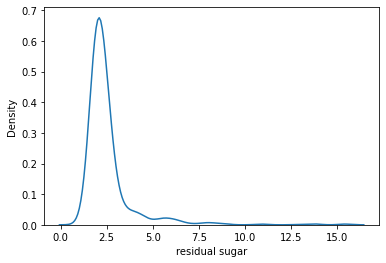

In [19]:
sns.kdeplot(df['residual sugar'])

C:\Users\prran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='residual sugar'>

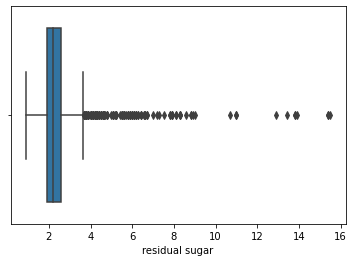

In [20]:
sns.boxplot(df['residual sugar'])

In [21]:
get_outliers(df['residual sugar'])

Mean of Array = 2.5388055034396517
Std Deviation of Array = 1.4094871124880504
value = 10.7 and Z-score = 5.79
value = 7.3 and Z-score = 3.38
value = 7.2 and Z-score = 3.31
value = 7.0 and Z-score = 3.17
value = 11.0 and Z-score = 6.0
value = 11.0 and Z-score = 6.0
value = 7.9 and Z-score = 3.8
value = 7.9 and Z-score = 3.8
value = 15.5 and Z-score = 9.2
value = 8.3 and Z-score = 4.09
value = 7.9 and Z-score = 3.8
value = 8.6 and Z-score = 4.3
value = 7.5 and Z-score = 3.52
value = 9.0 and Z-score = 4.58
value = 8.8 and Z-score = 4.44
value = 8.8 and Z-score = 4.44
value = 8.9 and Z-score = 4.51
value = 8.1 and Z-score = 3.95
value = 8.1 and Z-score = 3.95
value = 8.3 and Z-score = 4.09
value = 8.3 and Z-score = 4.09
value = 7.8 and Z-score = 3.73
value = 12.9 and Z-score = 7.35
value = 13.4 and Z-score = 7.71
value = 15.4 and Z-score = 9.12
value = 15.4 and Z-score = 9.12
value = 13.8 and Z-score = 7.99
value = 13.8 and Z-score = 7.99
value = 13.9 and Z-score = 8.06
value = 7.8 and Z-

[10.7,
 7.3,
 7.2,
 7.0,
 11.0,
 11.0,
 7.9,
 7.9,
 15.5,
 8.3,
 7.9,
 8.6,
 7.5,
 9.0,
 8.8,
 8.8,
 8.9,
 8.1,
 8.1,
 8.3,
 8.3,
 7.8,
 12.9,
 13.4,
 15.4,
 15.4,
 13.8,
 13.8,
 13.9,
 7.8]

## 'chlorides'

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

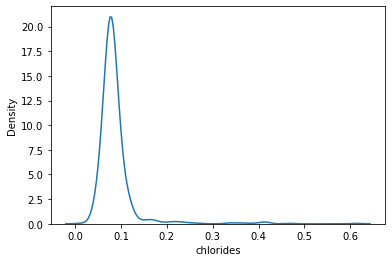

In [22]:
sns.kdeplot(df['chlorides'])

C:\Users\prran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chlorides'>

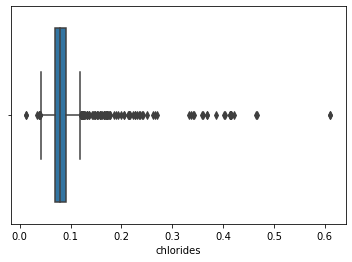

In [23]:
sns.boxplot(df['chlorides'])

In [24]:
get_outliers(df['chlorides'])

Mean of Array = 0.08746654158849257
Std Deviation of Array = 0.04705058260331576
value = 0.368 and Z-score = 5.96
value = 0.341 and Z-score = 5.39
value = 0.332 and Z-score = 5.2
value = 0.4639999999999999 and Z-score = 8.0
value = 0.401 and Z-score = 6.66
value = 0.467 and Z-score = 8.07
value = 0.236 and Z-score = 3.16
value = 0.61 and Z-score = 11.11
value = 0.36 and Z-score = 5.79
value = 0.27 and Z-score = 3.88
value = 0.337 and Z-score = 5.3
value = 0.263 and Z-score = 3.73
value = 0.611 and Z-score = 11.13
value = 0.358 and Z-score = 5.75
value = 0.3429999999999999 and Z-score = 5.43
value = 0.413 and Z-score = 6.92
value = 0.25 and Z-score = 3.45
value = 0.422 and Z-score = 7.11
value = 0.387 and Z-score = 6.37
value = 0.415 and Z-score = 6.96
value = 0.243 and Z-score = 3.31
value = 0.241 and Z-score = 3.26
value = 0.414 and Z-score = 6.94
value = 0.369 and Z-score = 5.98
value = 0.4029999999999999 and Z-score = 6.71
value = 0.414 and Z-score = 6.94
value = 0.415 and Z-score =

[0.368,
 0.341,
 0.332,
 0.4639999999999999,
 0.401,
 0.467,
 0.236,
 0.61,
 0.36,
 0.27,
 0.337,
 0.263,
 0.611,
 0.358,
 0.3429999999999999,
 0.413,
 0.25,
 0.422,
 0.387,
 0.415,
 0.243,
 0.241,
 0.414,
 0.369,
 0.4029999999999999,
 0.414,
 0.415,
 0.415,
 0.267,
 0.235,
 0.23]

## free sulfur dioxide

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

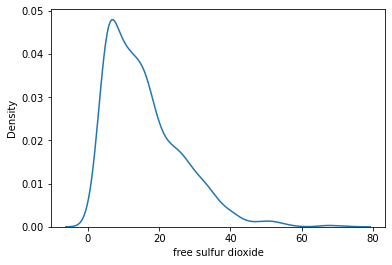

In [25]:
sns.kdeplot(df['free sulfur dioxide'])

C:\Users\prran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='free sulfur dioxide'>

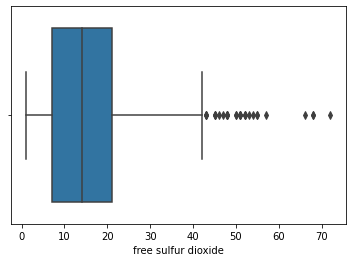

In [26]:
sns.boxplot(df['free sulfur dioxide'])

In [27]:
get_outliers(df['free sulfur dioxide'])

Mean of Array = 15.874921826141339
Std Deviation of Array = 10.456885614930723
value = 52.0 and Z-score = 3.45
value = 51.0 and Z-score = 3.36
value = 50.0 and Z-score = 3.26
value = 68.0 and Z-score = 4.98
value = 68.0 and Z-score = 4.98
value = 54.0 and Z-score = 3.65
value = 53.0 and Z-score = 3.55
value = 52.0 and Z-score = 3.45
value = 51.0 and Z-score = 3.36
value = 57.0 and Z-score = 3.93
value = 50.0 and Z-score = 3.26
value = 48.0 and Z-score = 3.07
value = 48.0 and Z-score = 3.07
value = 72.0 and Z-score = 5.37
value = 51.0 and Z-score = 3.36
value = 51.0 and Z-score = 3.36
value = 52.0 and Z-score = 3.45
value = 55.0 and Z-score = 3.74
value = 55.0 and Z-score = 3.74
value = 48.0 and Z-score = 3.07
value = 48.0 and Z-score = 3.07
value = 66.0 and Z-score = 4.79


[52.0,
 51.0,
 50.0,
 68.0,
 68.0,
 54.0,
 53.0,
 52.0,
 51.0,
 57.0,
 50.0,
 48.0,
 48.0,
 72.0,
 51.0,
 51.0,
 52.0,
 55.0,
 55.0,
 48.0,
 48.0,
 66.0]

## total sulfur dioxide

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

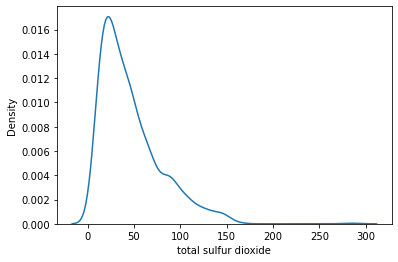

In [28]:
sns.kdeplot(df['total sulfur dioxide'])

C:\Users\prran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total sulfur dioxide'>

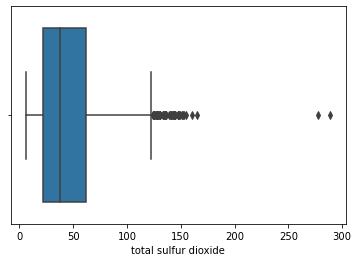

In [29]:
sns.boxplot(df['total sulfur dioxide'])

In [30]:
get_outliers(df['total sulfur dioxide'])

Mean of Array = 46.46779237023139
Std Deviation of Array = 32.88503665178367
value = 148.0 and Z-score = 3.09
value = 153.0 and Z-score = 3.24
value = 165.0 and Z-score = 3.6
value = 151.0 and Z-score = 3.18
value = 149.0 and Z-score = 3.12
value = 147.0 and Z-score = 3.06
value = 148.0 and Z-score = 3.09
value = 155.0 and Z-score = 3.3
value = 151.0 and Z-score = 3.18
value = 152.0 and Z-score = 3.21
value = 278.0 and Z-score = 7.04
value = 289.0 and Z-score = 7.38
value = 160.0 and Z-score = 3.45
value = 147.0 and Z-score = 3.06
value = 147.0 and Z-score = 3.06


[148.0,
 153.0,
 165.0,
 151.0,
 149.0,
 147.0,
 148.0,
 155.0,
 151.0,
 152.0,
 278.0,
 289.0,
 160.0,
 147.0,
 147.0]

## density

<AxesSubplot:xlabel='density', ylabel='Density'>

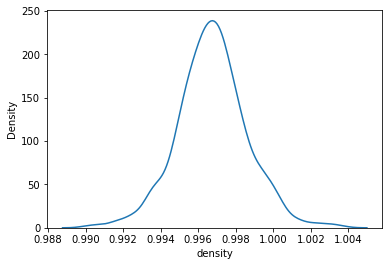

In [31]:
sns.kdeplot(df['density'])

C:\Users\prran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='density'>

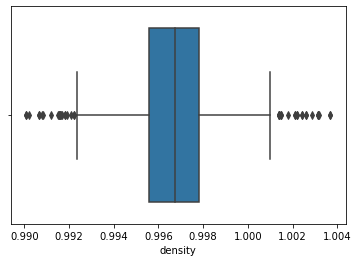

In [32]:
sns.boxplot(df['density'])

In [33]:
get_outliers(df['density'])

Mean of Array = 0.9967466791744831
Std Deviation of Array = 0.001886743700832392
value = 1.0032 and Z-score = 3.42
value = 1.0026 and Z-score = 3.1
value = 1.00315 and Z-score = 3.39
value = 1.00315 and Z-score = 3.39
value = 1.00315 and Z-score = 3.39
value = 1.0026 and Z-score = 3.1
value = 0.99064 and Z-score = -3.24
value = 0.99064 and Z-score = -3.24
value = 1.00289 and Z-score = 3.26
value = 0.99007 and Z-score = -3.54
value = 0.99007 and Z-score = -3.54
value = 0.9902 and Z-score = -3.47
value = 0.9908 and Z-score = -3.15
value = 0.99084 and Z-score = -3.13
value = 1.00369 and Z-score = 3.68
value = 1.00369 and Z-score = 3.68
value = 1.00242 and Z-score = 3.01
value = 1.00242 and Z-score = 3.01


[1.0032,
 1.0026,
 1.00315,
 1.00315,
 1.00315,
 1.0026,
 0.99064,
 0.99064,
 1.00289,
 0.99007,
 0.99007,
 0.9902,
 0.9908,
 0.99084,
 1.00369,
 1.00369,
 1.00242,
 1.00242]

## pH

<AxesSubplot:xlabel='pH', ylabel='Density'>

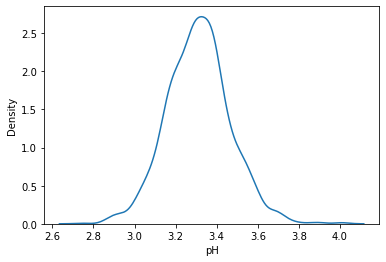

In [34]:
sns.kdeplot(df['pH'])

C:\Users\prran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pH'>

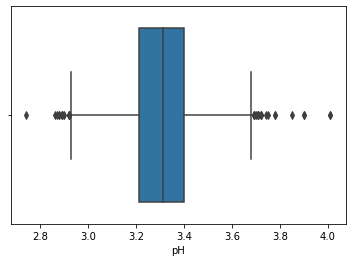

In [35]:
sns.boxplot(df['pH'])

In [36]:
get_outliers(df['pH'])

Mean of Array = 3.311113195747343
Std Deviation of Array = 0.15433818141060152
value = 3.9 and Z-score = 3.82
value = 3.85 and Z-score = 3.49
value = 2.74 and Z-score = -3.7
value = 3.9 and Z-score = 3.82
value = 3.78 and Z-score = 3.04
value = 3.78 and Z-score = 3.04
value = 4.01 and Z-score = 4.53
value = 4.01 and Z-score = 4.53


[3.9, 3.85, 2.74, 3.9, 3.78, 3.78, 4.01, 4.01]

## sulphates

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

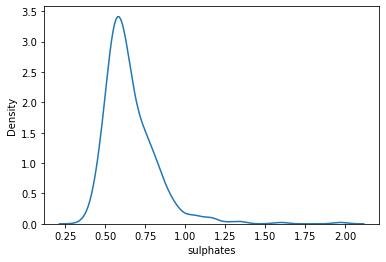

In [37]:
sns.kdeplot(df['sulphates'])

C:\Users\prran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sulphates'>

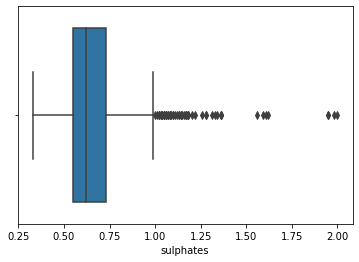

In [38]:
sns.boxplot(df['sulphates'])

In [39]:
get_outliers(df['sulphates'])

Mean of Array = 0.6581488430268921
Std Deviation of Array = 0.16945396724179526
value = 1.56 and Z-score = 5.32
value = 1.28 and Z-score = 3.67
value = 1.2 and Z-score = 3.2
value = 1.28 and Z-score = 3.67
value = 1.95 and Z-score = 7.62
value = 1.22 and Z-score = 3.32
value = 1.95 and Z-score = 7.62
value = 1.98 and Z-score = 7.8
value = 1.31 and Z-score = 3.85
value = 2.0 and Z-score = 7.92
value = 1.59 and Z-score = 5.5
value = 1.61 and Z-score = 5.62
value = 1.26 and Z-score = 3.55
value = 1.36 and Z-score = 4.14
value = 1.18 and Z-score = 3.08
value = 1.36 and Z-score = 4.14
value = 1.36 and Z-score = 4.14
value = 1.17 and Z-score = 3.02
value = 1.62 and Z-score = 5.68
value = 1.18 and Z-score = 3.08
value = 1.34 and Z-score = 4.02
value = 1.17 and Z-score = 3.02
value = 1.17 and Z-score = 3.02
value = 1.33 and Z-score = 3.96
value = 1.18 and Z-score = 3.08
value = 1.17 and Z-score = 3.02
value = 1.17 and Z-score = 3.02


[1.56,
 1.28,
 1.2,
 1.28,
 1.95,
 1.22,
 1.95,
 1.98,
 1.31,
 2.0,
 1.59,
 1.61,
 1.26,
 1.36,
 1.18,
 1.36,
 1.36,
 1.17,
 1.62,
 1.18,
 1.34,
 1.17,
 1.17,
 1.33,
 1.18,
 1.17,
 1.17]

##  alcohol

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

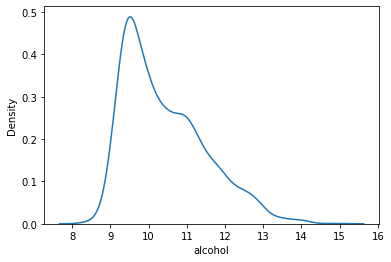

In [40]:
sns.kdeplot(df['alcohol'])

C:\Users\prran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alcohol'>

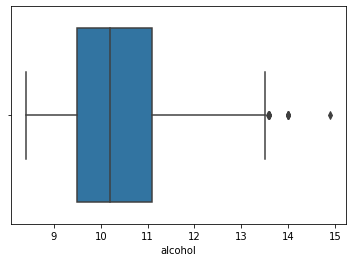

In [41]:
sns.boxplot(df['alcohol'])

In [42]:
get_outliers(df['alcohol'])

Mean of Array = 10.422983114446502
Std Deviation of Array = 1.0653343003437463
value = 14.0 and Z-score = 3.36
value = 14.0 and Z-score = 3.36
value = 14.0 and Z-score = 3.36
value = 14.0 and Z-score = 3.36
value = 14.9 and Z-score = 4.2
value = 14.0 and Z-score = 3.36
value = 14.0 and Z-score = 3.36
value = 14.0 and Z-score = 3.36


[14.0, 14.0, 14.0, 14.0, 14.9, 14.0, 14.0, 14.0]

In [43]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [44]:
df["quality"] = [1 if i>6 else 0 for i in df["quality"]]

In [45]:
df.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

C:\Users\prran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

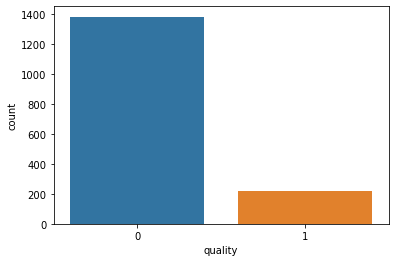

In [46]:
sns.countplot(df.quality)

## Model Training

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [48]:
x = df.drop("quality",axis=1)
y = df["quality"]

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
x_res , y_res = SMOTE().fit_resample(x,y)
y_res.unique()


array([0, 1], dtype=int64)

In [51]:
x_res.shape

(2764, 11)

In [52]:
y_res.shape

(2764,)

In [53]:
y_res.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

C:\Users\prran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

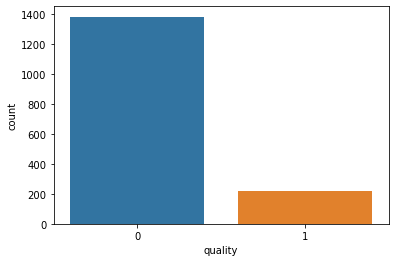

In [54]:
sns.countplot(df.quality)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.3,random_state=6,stratify=y_res)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1934, 11), (830, 11), (1934,), (830,))

In [57]:
model = LogisticRegression(max_iter=300)
model.fit(x_train,y_train)

C:\Users\prran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=300)

In [58]:
def model_eval(model,x,y):
    y_pred = model.predict(x)
    
    print(f"Accuracy Score = {accuracy_score(y,y_pred)}")
    print(f" confusion matrix = \n{confusion_matrix(y,y_pred)}")
    print(f"Clasification report = \n{classification_report(y,y_pred)}")
    

In [59]:
model_eval(model,x_train,y_train)

Accuracy Score = 0.8133402275077559
 confusion matrix = 
[[764 203]
 [158 809]]
Clasification report = 
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       967
           1       0.80      0.84      0.82       967

    accuracy                           0.81      1934
   macro avg       0.81      0.81      0.81      1934
weighted avg       0.81      0.81      0.81      1934



In [60]:
model_eval(model,x_test,y_test)

Accuracy Score = 0.8265060240963855
 confusion matrix = 
[[335  80]
 [ 64 351]]
Clasification report = 
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       415
           1       0.81      0.85      0.83       415

    accuracy                           0.83       830
   macro avg       0.83      0.83      0.83       830
weighted avg       0.83      0.83      0.83       830



## Pickel file

In [61]:
import json
import pickle

In [62]:
with open("wine_quality_model.pkl","wb") as file:
    pickle.dump(model,file)

In [63]:
col = {"Columns" : df.columns.to_list()}
col

{'Columns': ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality']}

In [64]:
with open("column.json","w") as file:
    json.dump(col,file)

In [65]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
